In [1]:
# All  import statements needed for the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/models/model_cnn_model.hdf5')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/clean_data.csv')

In [5]:
df.drop(df.columns[0] , inplace=True , axis=1)
LabelColumns = ['Label_BENIGN', 'Label_Bot','Label_DDoS', 'Label_DoS GoldenEye', 'Label_DoS Hulk','Label_DoS Slowhttptest', 'Label_DoS slowloris', 'Label_FTP-Patator','Label_Heartbleed', 'Label_Infiltration', 'Label_PortScan','Label_SSH-Patator']
y = df[LabelColumns]
X = df.drop(LabelColumns , axis=1)

In [6]:
X.shape , y.shape

((1851553, 83), (1851553, 12))

In [7]:
X = X.to_numpy().reshape(-1, 83,1)

In [8]:
type(model)

keras.engine.sequential.Sequential

In [9]:
predicted = model.predict(X)
predicted

57862/57862 [==============================] - 157s 3ms/step


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.3581806e-20, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [7.9024920e-20, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [6.5310840e-20, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [10]:
y.shape

(1851553, 12)

In [11]:
predicted.shape

(1851553, 12)

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
cols = y.columns

In [14]:
type(predicted)

numpy.ndarray

In [15]:
y

,Label_BENIGN,Label_Bot,Label_DDoS,Label_DoS GoldenEye,Label_DoS Hulk,Label_DoS Slowhttptest,Label_DoS slowloris,Label_FTP-Patator,Label_Heartbleed,Label_Infiltration,Label_PortScan,Label_SSH-Patator
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1851548,0,0,0,0,0,0,0,0,0,0,0,1
1851549,0,0,0,0,0,0,0,0,0,0,0,1
1851550,0,0,0,0,0,0,0,0,0,0,0,1
1851551,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
y = y.to_numpy()

In [17]:
#pred_test= model.predict(X)
scores2 = model.evaluate(X, y, verbose=1)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

57862/57862 [==============================] - 207s 4ms/step - loss: 3.4680e-04 - accuracy: 0.9996
Accuracy on test data: 0.9996418952941895% 
 Error on test data: 0.0003581047058105469


In [18]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.00034680023>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.9996419>}

In [19]:
predicted[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
len(np.argmax(predicted,axis=1))

1851553

In [21]:
y_prediction = np.argmax (predicted, axis = 1)

In [22]:
y_prediction.shape

(1851553,)

In [23]:
y_test=np.argmax(y , axis=1)

In [24]:
y_test.shape

(1851553,)

In [25]:
y_prediction

array([ 0,  0,  0, ..., 11, 11, 11])

In [26]:
y_test

array([ 0,  0,  0, ..., 11, 11, 11])

In [27]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_prediction)}")

Accuracy of the classifier is: 0.9996419222134068


In [28]:
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, y_prediction,pos_label='positive',average='micro')}")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precision Score of the classifier is: 0.9996419222134068


In [29]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, y_prediction,pos_label='positive',average='micro')}")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Recall Score of the classifier is: 0.9996419222134068


In [30]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, y_prediction,pos_label='positive',average='micro')}")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


F1 Score of the classifier is: 0.9996419222134068


AUC for our classifier is: 0.6932369395339556


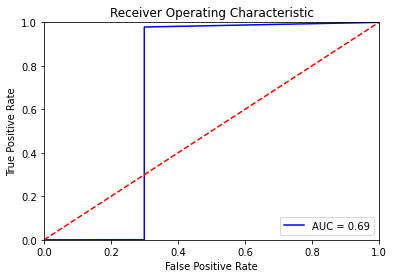

In [31]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_prediction, pos_label=1)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ROC _ CURVE IS NOT SUPPORTED FOR MULTICLASS LABELS :_(

In [32]:
#generating a report to extract the measure of interest using built-in sklearn function
report = classification_report(y_test, y_prediction,digits=3,output_dict = True)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
report

{'0': {'precision': 0.9999128045378679,
  'recall': 0.9997986246293652,
  'f1-score': 0.9998557113238833,
  'support': 1296087},
 '1': {'precision': 0.9811224489795919,
  'recall': 0.9781281790437436,
  'f1-score': 0.9796230259806419,
  'support': 1966},
 '2': {'precision': 0.999984377563056,
  'recall': 0.9999375131808135,
  'f1-score': 0.9999609448228457,
  'support': 128027},
 '3': {'precision': 0.9990173921587894,
  'recall': 0.9877586709414165,
  'f1-score': 0.9933561309233024,
  'support': 10293},
 '4': {'precision': 0.9984099344530045,
  'recall': 0.9999826894531165,
  'f1-score': 0.999195693066096,
  'support': 231073},
 '5': {'precision': 0.9970566593083149,
  'recall': 0.9856337515911984,
  'f1-score': 0.9913122999542752,
  'support': 5499},
 '6': {'precision': 0.994994822229893,
  'recall': 0.9946514837819186,
  'f1-score': 0.9948231233822261,
  'support': 5796},
 '7': {'precision': 0.9938488576449912,
  'recall': 0.9973544973544973,
  'f1-score': 0.9955985915492958,
  'supp

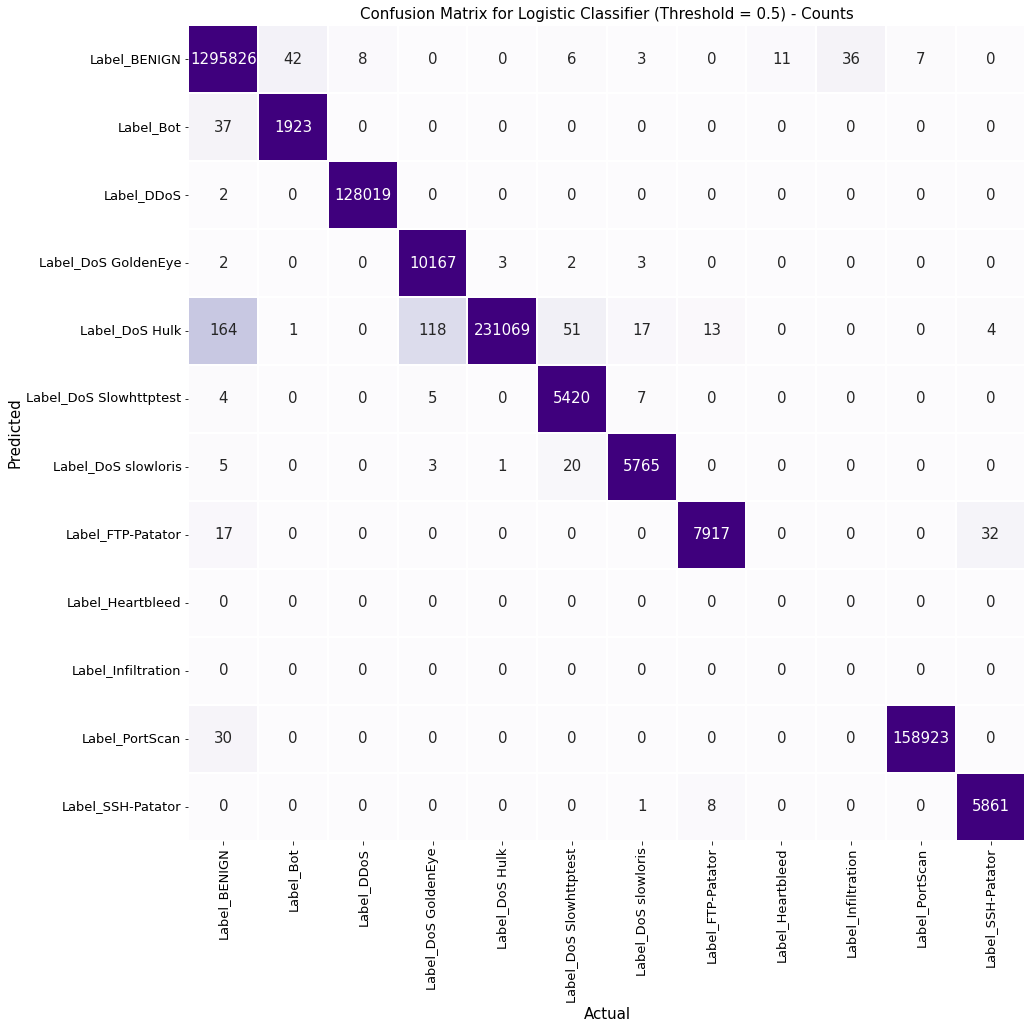

In [34]:
import sklearn
cm_logis = sklearn.metrics.confusion_matrix(y_test, y_prediction)
#put it into a dataframe
cm_logis_df = pd.DataFrame(cm_logis)

#plot CM
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(pd.DataFrame(cm_logis_df.T), annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=500, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=cols, yticklabels=cols)
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(cols, fontsize=13)
ax.set_yticklabels(cols, fontsize=13)
plt.title("Confusion Matrix for Logistic Classifier (Threshold = 0.5) - Counts", fontsize=15)
plt.show()